### Student Information
Name: Deniz Can Ozer 詹奧澤

Student ID: NE6148418

GitHub ID: https://github.com/Deniz-Can

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [3]:
### Begin Assignment Here
### same tasks as in phase 1 master notebook applied to the new dataset

# necessary libraries
#
import pandas as pd
import plotly.express as px
import plotly as py
import math 
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# general preparations & set-up
#
data_path = '/Users/denizcanozer/Documents/Uni_and_Career/TUM/TUM_MSc_RCI_2024/***TUM_MSc_RCI_Organizational/Exchange or Stay Abroad/TUMexchange at NCKU in WS2526/*NCKU Courses Fall 2025/1) DMCTA/DMCTA_Labs/Lab1/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv'
df_raw = pd.read_csv(data_path)
n_rows_raw,n_columns_raw = df_raw.shape

# how does the data table/ dimensionality look like:
print(f"#rows: {n_rows_raw}, #columns: {n_columns_raw}")

# nr. of records (rows) w/ a specific lable: to spot any imbalances
counts = df_raw["label"].value_counts(dropna=False)
percentage_counts = (counts/counts.sum()*100).round(1)
summary_counts = pd.DataFrame({
    "count": counts,
    "percentage": percentage_counts
})
summary_counts["percentage"] = summary_counts["percentage"].astype(str) + "%"
display(summary_counts)
print(df_raw.head(3))

# translation of numeric lables to textual
label_map ={
    1.0: "positive", 0.0: "neutral", -1.0: "negative" 
}
df_raw["label_name"] = df_raw["label"].map(label_map)
print(df_raw[["label","label_name"]].head())           # prints first 5 labels


# data preprocessing and preparation
#
# cols_to_drop = ['post_id','url','datetime','author','entities','type','downvotes','upvote_ratio']

# find and drop all records w/ missing/ invalid target labels, keep all columns (actually 0)
valid_labels = {-1, 0, 1}
invalid_label_mask = ~df_raw["label"].isin(valid_labels)
n_invalid = invalid_label_mask.sum()
print(f"nr. of invalid or missing labels: {n_invalid}")

# find and drop all records w/ missing/ empty string text or titles (actually zero)
invalid_title_mask = (
    df_raw["title"].isna() | df_raw["title"].astype(str).str.strip().eq("")
)
invalid_text_mask = (
    df_raw["text"].isna() | df_raw["text"].astype(str).str.strip().eq("")
)
print(f"#rows w/ missing/empty title: {invalid_title_mask.sum()}")
print(f"#rows w/ missing/empty text: {invalid_text_mask.sum()}")


# unused columns/ features to simplify the problem
#most useful: title, text, label
#useful for visualizations and meta-analysis: datetime, subreddit, type, upvotes, downvotes, upvote-ratio, entities
#useful for debugging/ traceability: post-id
#dropped columns: author, url, subjectivity, polarity, sentiment



#rows: 847, #columns: 16


,count,percentage
label,,
0.0,423,49.9%
-1.0,315,37.2%
1.0,109,12.9%


      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1

In [4]:
### EXERCISE 1 ###
# print out text data and category for the first 3 samples in the dataset
# text data (title and text) and label will be printed out

for i in range(3):
    title_and_text = (df_raw.loc[i,"title"] + " | " + df_raw.loc[i,"text"]).strip()
    print(f"Reddit entry title and text {i+1}:\n{title_and_text}\n")
    print(f"Label: {df_raw.loc[i,'label']} (label={df_raw.loc[i,'label_name']})\n")


# # only text (not title)
# for i in range(3):
#     print(f"Reddit entry text {i+1}:\n{df_raw.loc[i,'text'].strip()}\n")
#     print(f"Label: {df_raw.loc[i,'label']} (label={df_raw.loc[i,'label_name']})\n")

Reddit entry title and text 1:
Retardation is on the menu boys! WSB is so back | Calls on retards

Label: -1.0 (label=negative)

Reddit entry title and text 2:
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history | Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

Label: 0.0 (label=neutral)

Reddit entry title and text 3:
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision? | Seeing lots of red in the ticker.

Label: 0.0 (label=neutral)



In [6]:
### EXERCISE 2 ###
# Experiment with other querying techniques using pandas dataframes. Refer to their documentation.

# build Pandas data frame
cols = [
    "type","datetime","post_id","subreddit","title","author","url","upvotes","downvotes","upvote_ratio","text",
    "subjectivity","polarity","sentiment","entities","label"
]
X = pd.DataFrame(df_raw[cols].copy())

# add label_name to the frame
X["label_name"] = X["label"].map(label_map)
display(X.head())


# query techniques

# 1) boolean indexing (filtering by a condition such as specific label)
# get all rows where label is -1
negative_entries = X[X["label"] == -1]
print(f"Found {len(negative_entries)} entries labelled negative")

# 2) using string search (filtering by text content)
# get all rows where text contains the word 'TSLA' (case-insensitive)
tsla_entries = X[X["text"].str.contains("TSLA",case=False,na=False)]
print(f"Found {len(tsla_entries)} entries containing the word 'TSLA'")

# 3) the .query() method (filtering by complex/ specific conditions like SQL)
# get all rows where subreddit is "wallstreetbets" and label is neutral
wsb_neutral_entries = X.query('subreddit == "wallstreetbets" and label == 0')
print(f"Found {len(wsb_neutral_entries)} entries in subreddit 'wallstreetbets' with neutral label (0)")

# 4) the .isin() method (filtering by a list of values)
# useful for filtering by multiple labels without using long OR statements
target_labels = [-1,1]
polarizing_entries = X[X["label"].isin(target_labels)]
print(f"Found {len(polarizing_entries)} entries which are either negative (-1) or positive (-1)")

# 5) random sampling with .sample() (getting a random subset of entries)
random_entries = X.sample(n=2, random_state=42)
print("Randomly selected 2 entries:")
print(random_entries)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,negative
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,neutral
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,neutral
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,positive
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,negative


Found 315 entries labelled negative
Found 3 entries containing the word 'TSLA'
Found 79 entries in subreddit 'wallstreetbets' with neutral label (0)
Found 424 entries which are either negative (-1) or positive (-1)
Randomly selected 2 entries:
        type             datetime  post_id       subreddit  \
457  comment  2025-04-11 15:42:58  mmkwda9     StockMarket   
342  comment   2025-04-12 3:04:05  mmob98a  wallstreetbets   

                                                 title              author  \
457  Trump: We Are Doing Really Well On Our Tariff ...  IamNotaMonkeyRobot   
342  Retail giant TARGET has now declined for 10 co...    iPlayedHockeInHS   

                                      url  upvotes  downvotes  upvote_ratio  \
457   https://i.redd.it/uajqu4kxl7ue1.png        1        NaN           NaN   
342  https://i.redd.it/7tl6puv9waue1.jpeg        1        NaN           NaN   

               text  subjectivity  polarity  sentiment               entities  \
457       "We" 

In [7]:
### EXERCISE 3 ###

# filter by 'neutral' label and query every 10th record and print only the first 5 results

X[X["label"] == 0][::10].head(5)

# or just display selected columns
# X[X["label"] == 0][::10].head(5)[["title","text","label","label_name"]]


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,neutral
22,comment,2025-04-12 2:46:28,mmo8obq,wallstreetbets,Retail giant TARGET has now declined for 10 co...,tiredsultan,https://i.redd.it/7tl6puv9waue1.jpeg,5,NaN,NaN,"Google ""target dei"".\n\nI did it for you.\n\n",0.000000,0.000000,0.0,"['dei', 'Google', 'target']",0.0,neutral
40,comment,2025-04-11 22:00:36,mmmyq7m,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,InstructionNo4546,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,These China AI factory memes are pretty good. ...,0.800000,0.475000,1.0,"['factory', 'time', 'AI', 'China AI', 'China',...",0.0,neutral
55,comment,2025-04-11 16:00:46,mml01xt,stocks,The US bond market is continuing to crash. Wil...,J3ster14,https://www.reddit.com/r/stocks/comments/1jwsz...,1,NaN,NaN,The steal,0.000000,0.000000,0.0,['steal'],0.0,neutral
72,post,2025-04-04 6:25:04,1jr5ag5,stockstobuytoday,Spending first $250 tmmw on stocks,Alarmed_Champion_913,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,"['cuz', 'OPTT', 'BLGO', 'im', 'money', 'idea',...",0.0,neutral


In [8]:
### EXERCISE 4 ###
# calculate missing values per row (for every record) using axis
# returns a panda series with the 1st column showing the document index and the 2nd column showing the count of missing values in that row

X.isnull().sum(axis=1)

0      2
1      2
2      2
3      0
4      2
      ..
842    2
843    2
844    0
845    2
846    2
Length: 847, dtype: int64

In [ ]:
### EXERCISE 5 ###
# This was an explanation task independent of the dataset at hand. So, the same explanation holds generally.

#explanation:
#observation and explanation
# The .isnull() method only identifies actual NaN values (np.nan) as missing and thus failed to identify rows 2, 3, and 5 
# as missing because technically they are not NaN values but string representations or empty strings.
# It only idetifed row 0, 1, and 4 correctly as missing.
# It returned False for the strings 'NaN', 'None', and the empty string'' which is incorrect for our goal.
# This happens because .isnull() only checks for np.nan values and does not consider other representations of missing data.
# It does not automatically interpret strings like 'NaN' or 'None' as missing values. Strings are considered valid entries -
# this holds for the empty string as well, which is a string of length zero but still a valid string.


In [9]:
### EXERCISE 6 ###

# check whether there are duplicate rows/ records
nr_duplicates = sum(X.duplicated())
print(f"nr. of entire duplicate rows: {nr_duplicates}")
nr_duplicate_titles = sum(X.duplicated('title'))
nr_duplicate_texts = sum(X.duplicated('text'))
nr_duplicate_authors = sum(X.duplicated('author'))
print(f"nr. of duplicate titles: {nr_duplicate_titles}\nnr. of duplicate texts: {nr_duplicate_texts}\nnr. of duplicate authors: {nr_duplicate_authors}")


# ex. 6: changes to the dataframe after sampling
# sampling the dataframe
X_sample = X.sample(n=333)
# compare size (nr. of rows)
print(f"\nOriginal X rows: {len(X)}")
print(f"Sampled X_sample rows: {len(X_sample)}")

# check the indices (order of the data)
print(f"\nFirst 5 indices of original X: {X.index[:5].tolist()}")
print(f"First 5 indices of X_sample: {X_sample.index[:5].tolist()}")

# observation
# To create X_sample, 333 records were randomly selected from X without replacement.
# Therefore, X_sample contains a subset of rows from X, but the order of rows in X_sample does not match the original order in X.
# The indices in X_sample correspond to the original indices in X, but they are not sequential because of the random sampling process.
# The X dataframe has sequential indices.

nr. of entire duplicate rows: 0
nr. of duplicate titles: 720
nr. of duplicate texts: 23
nr. of duplicate authors: 116

Original X rows: 847
Sampled X_sample rows: 333

First 5 indices of original X: [0, 1, 2, 3, 4]
First 5 indices of X_sample: [553, 305, 712, 576, 390]


{1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}

label_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64

label_name
neutral     157
negative    136
positive     40
Name: count, dtype: int64


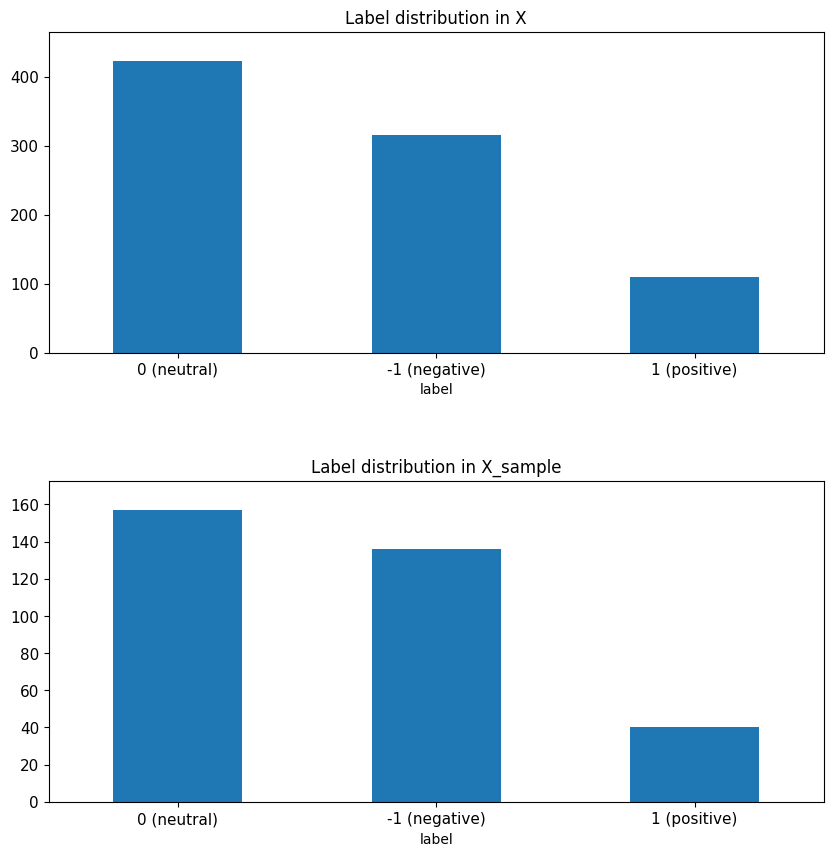

In [10]:
### EXERCISE 7 ###

import matplotlib.pyplot as plt

print(label_map)
print(f"\n{X.label_name.value_counts()}")
print(f"\n{X_sample.label_name.value_counts()}")

# calculate the value counts for each category in both datasets first and store them in variables
counts_X_sample = X_sample.label.value_counts()
counts_X = X.label.value_counts()

# find the maximum count to set y-axis limit and add some buffer for better visualization
max_val_X_sample = counts_X_sample.max() * 1.1
max_val_X = counts_X.max() * 1.1

# plot using a dynamic max value for y-axis limit (with some buffer for better visualization)
fig, axes = plt.subplots(2, 1, figsize=(10, 10)) 
counts_X.plot(kind='bar', ax=axes[0], title='Label distribution in X', ylim=[0, max_val_X], rot=0, fontsize=11)
counts_X_sample.plot(kind='bar', ax=axes[1], title='Label distribution in X_sample', ylim=[0, max_val_X_sample], rot=0, fontsize=11) 
tick_map = {"-1.0": "-1 (negative)", "0.0": "0 (neutral)", "1.0": "1 (positive)"} # richer horizontal labeling
for ax in axes:
    labels = [tick_map.get(tick.get_text(), tick.get_text()) for tick in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=0)
plt.subplots_adjust(hspace=0.4) # adjust space between plots
plt.show()

<Axes: title={'center': 'Label Distribution Comparison: Original vs. Sampled Dataset'}, xlabel='label_name'>

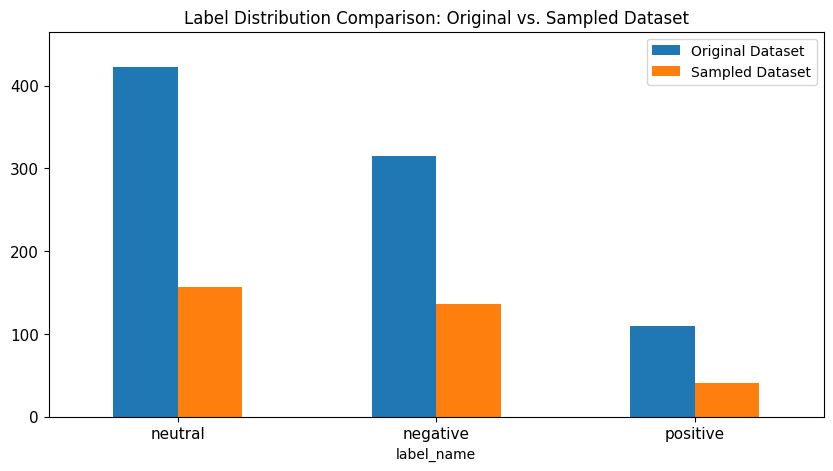

In [11]:
### EXERCISE 8 ###

# combine data frames
comparison_df = pd.DataFrame({
    'Original Dataset': X.label_name.value_counts(),
    'Sampled Dataset': X_sample.label_name.value_counts()
})

comparison_df.sort_values(by='Original Dataset', ascending=False, inplace=True)

# calculate dynamic y-axis limit
max_y = comparison_df.values.max().max() * 1.1 

# visualize side-by-side bar chart
comparison_df.plot(kind='bar',
                   title='Label Distribution Comparison: Original vs. Sampled Dataset',
                   ylim=[0, max_y],
                   rot=0,
                   fontsize=11,
                   figsize=(10,5))


In [12]:
### EXERCISE 9 ###
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?

# build analyzer using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])
print(X_counts.shape)

analyze = count_vect.build_analyzer()

# analyze function applied to the first text entry of X
analyze(X.text[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1
(847, 4346)


['calls', 'on', 'retards']

In [13]:
### Exercise 10 ###

# get list of vocabulary terms
vocab = count_vect.get_feature_names_out()

# get indices of non-zero values for the 6th record (index 5)
non_zero_indices = X_counts[6].indices
relevant_indices = non_zero_indices[non_zero_indices < 300]

print(f"nr. of relevant indices: {len(relevant_indices)}")

target_index = relevant_indices[1]
target_word = vocab[target_index]
print(f"\nThe first word is: '{vocab[relevant_indices[0]]}' (at index {relevant_indices[0]})")
print(f"The second word is: '{target_word}' (at index {target_index}).")

nr. of relevant indices: 2

The first word is: 'all' (at index 289)
The second word is: 'adjust' (at index 225).


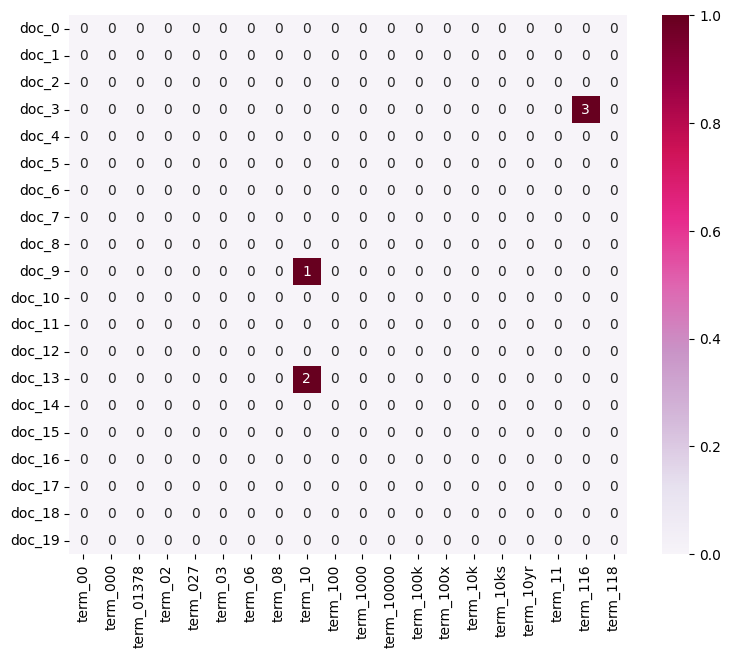

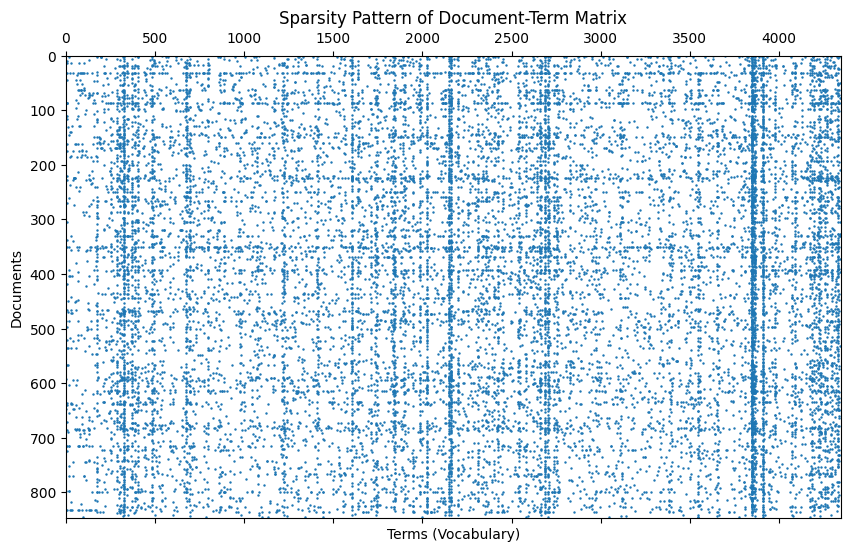

In [14]:
### Exercise 11 ###

## preparation

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

# more appealing plots
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


# ex.11 same problem as in master notebook
# problems:
# The problem is that visualizing the entire matrix (with over 2000 documents and 30000+ terms) would be overwhelming and not interpretable.
# The heatmap would be too large to fit on a screen, making it impossible to see any meaningful patterns or insights.
# Additionally, most entries in the document-term matrix are zeros (sparsity), leading to a cluttered and uninformative visualization.
# solution:
# Useing Spy Plot the large sparse matrice can be visualized effectively. This allows to see the distribution of non-zero entries without plotting every single value.
plt.figure(figsize=(10, 6))
plt.spy(X_counts, markersize=0.7, aspect='auto')
plt.title('Sparsity Pattern of Document-Term Matrix')
plt.xlabel('Terms (Vocabulary)')
plt.ylabel('Documents')
plt.show()

In [15]:
### Exercise 12 ###
# nicer visualizations

import plotly.express as px

# more appealing graphics with an interactive plot
# not all 300 labels are shown on x-axis to avoid clutter

term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

subset_terms = count_vect.get_feature_names_out()[:300]
subset_freqs = term_frequencies[:300]

df_plotly = pd.DataFrame({
    'Term': subset_terms,
    'Frequency': subset_freqs
})

fig = px.bar(df_plotly, x='Term', y='Frequency',
             title='Interactive Term Frequency Distribution (First 300 Terms)',
             labels={'Term': 'Vocabulary Word', 'Frequency': 'Count'})
fig.update_layout(xaxis_tickangle=-90)
fig.show()


In [16]:
### Exercise 13 ###
# reduce by frequeny (high frequency words are more meaningful for text analysis)

import plotly.express as px

df_all_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# sort by frequency descending and slice the top 50
df_sorted = df_all_terms.sort_values(by='Frequency', ascending=False)
df_top_50 = df_sorted.head(50)

# order the top 50 most frequent ones by term alphabetically
df_top_50_alpha = df_top_50.sort_values(by='Term', ascending=True)

# plot order by frquency
fig1 = px.bar(df_top_50, x='Term', y='Frequency',
             title='Top 50 Terms by Frequency',
             labels={'Term': 'Vocabulary Word', 'Frequency': 'Count'})
fig1.update_layout(xaxis_tickangle=-90)
fig1.show()

# plot order by term alphabetically
fig2 = px.bar(df_top_50_alpha, x='Term', y='Frequency',
             title='Top 50 Terms by Frequency in Alphabetical Order',
             labels={'Term': 'Vocabulary Word', 'Frequency': 'Count'})
fig2.update_layout(xaxis_tickangle=-90)
fig2.show()

In [17]:
### Exercise 14 ###
# before doing ex. 14 I had decided to plot the top 50 frequent terms in exercise 13 because
# it asked for a an efficient and meaningful reduction of the words to be plotted

import plotly.express as px

df_all_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# sort by frequency descending and slice the top 50
df_sorted = df_all_terms.sort_values(by='Frequency', ascending=False)
df_long_tail = df_sorted.head(500)

# order the top 300 most frequent ones by term alphabetically
df_top_50_alpha = df_top_50.sort_values(by='Term', ascending=True)

# plot order by frquency
fig1 = px.bar(df_long_tail, x='Term', y='Frequency',
             title='Top 50 Terms by Frequency',
             labels={'Term': 'Vocabulary Word', 'Frequency': 'Count'})
fig1.update_layout(xaxis_tickangle=-90)
fig1.show()


/var/folders/45/zf0t5wzn04vcsyths21qfcvc0000gn/T/ipykernel_73549/442708114.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



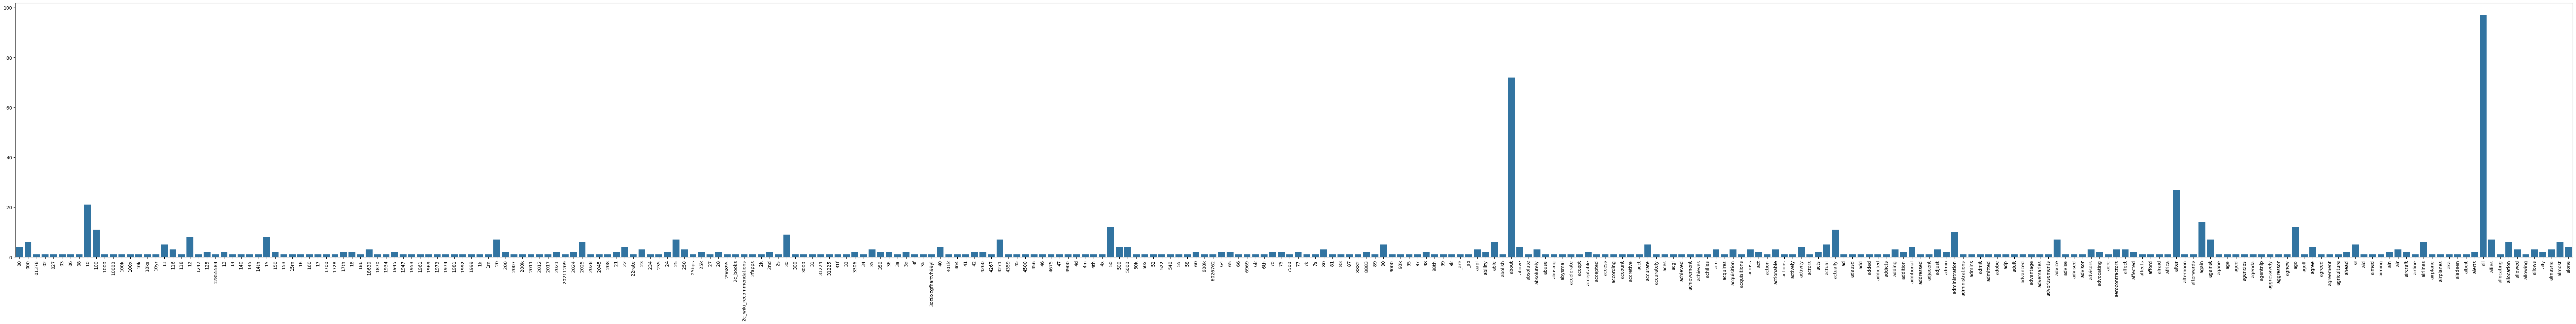

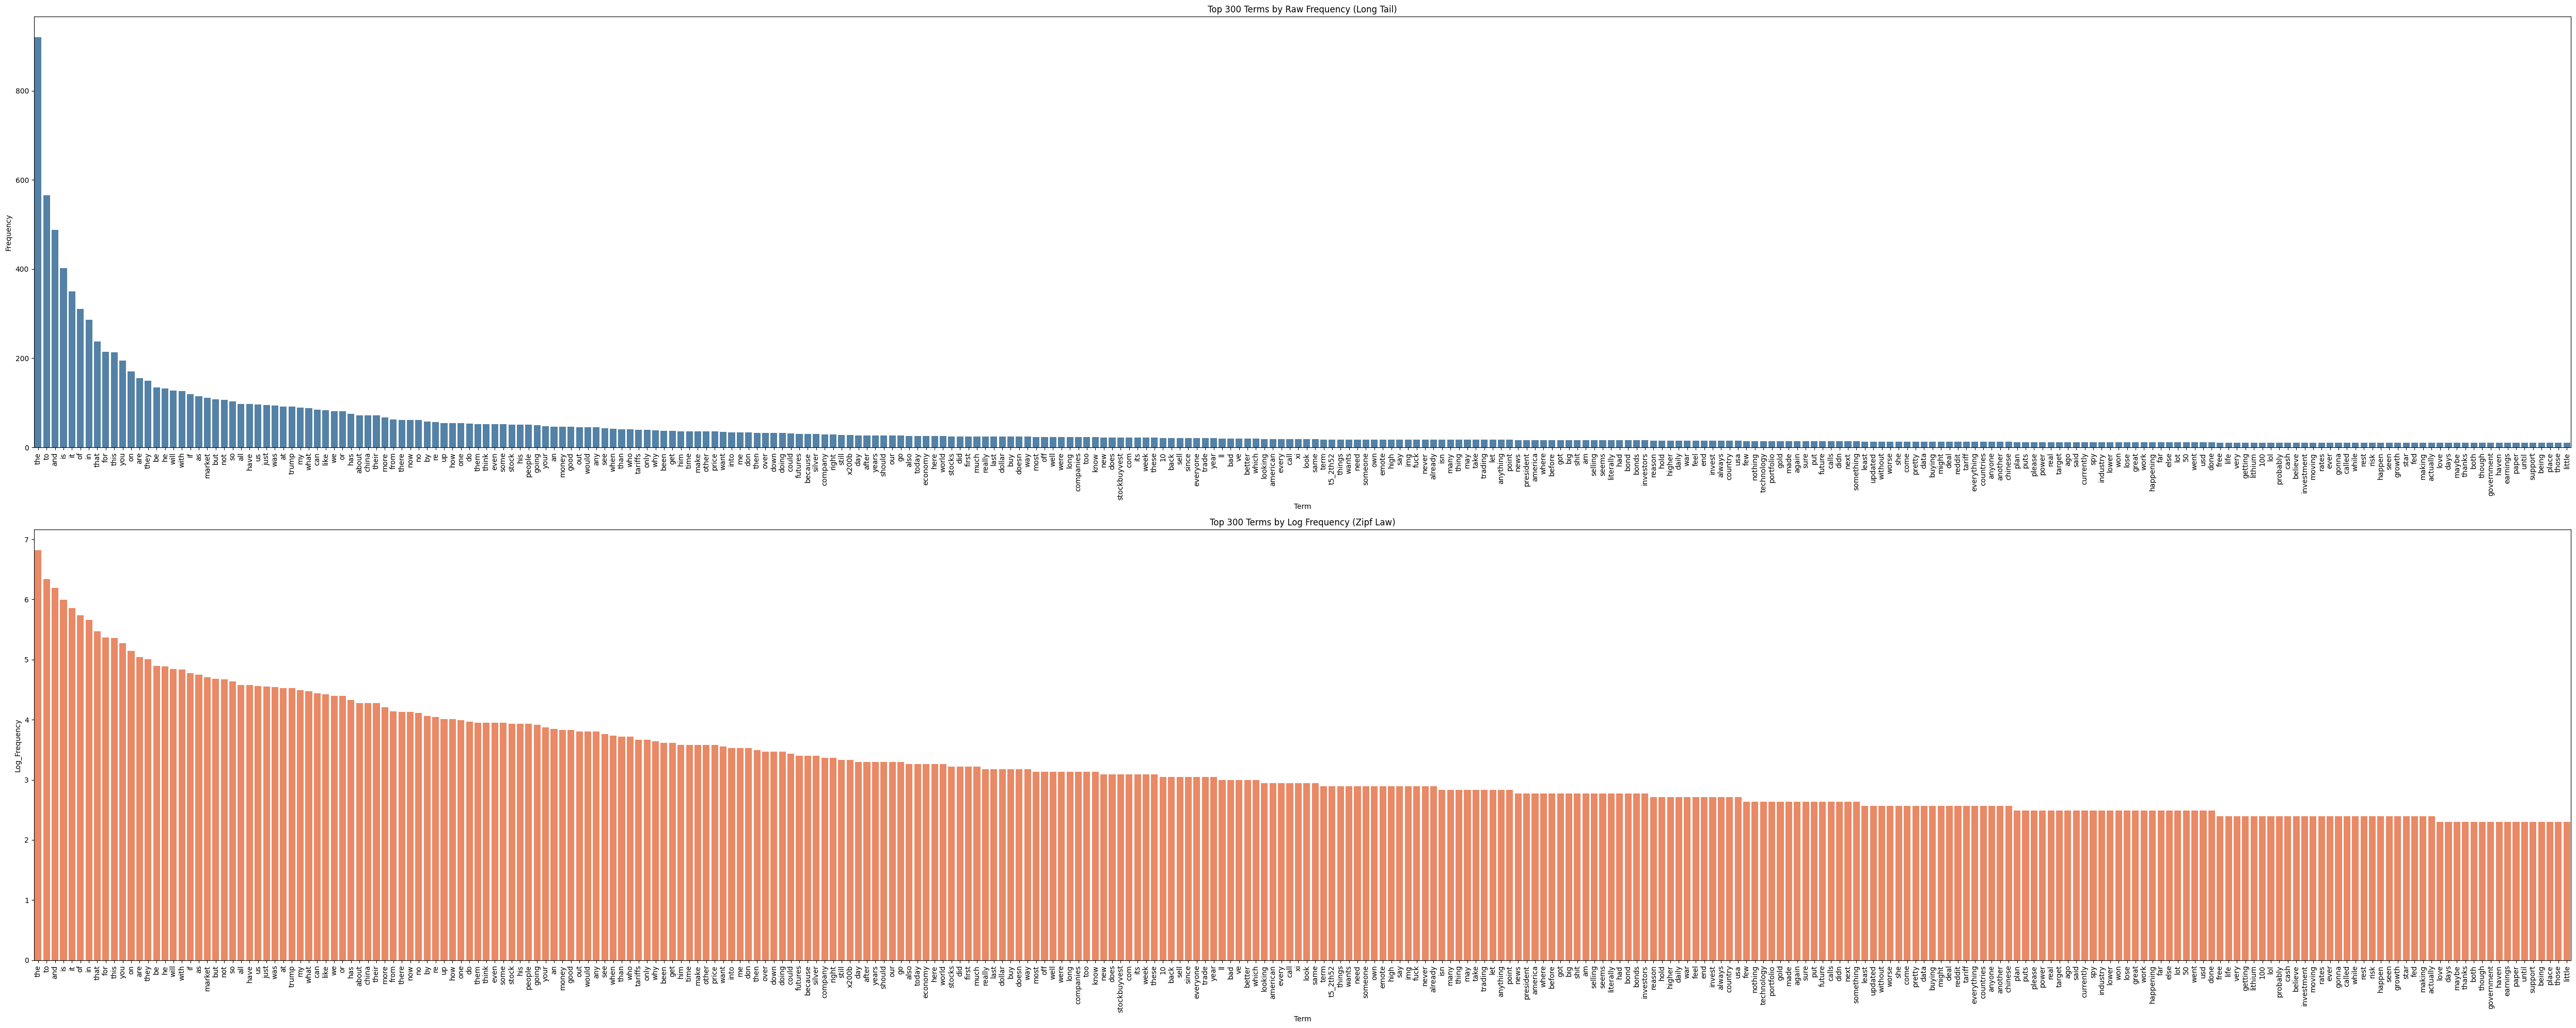

In [18]:
### Exercise 15 ###

# preparation
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

# comments and observations
# # difference
# The raw frequency plot shows a few very high-frequency terms dominating the visualization, making it hard to see the distribution of lower-frequency terms.
# It is dominated by a few "skyscraper" term with very high counts and most other words appear to be almost flatlined.
# # This is because text data is usually heavily skewed, with a small number of very common words and a long tail of rare words.
# The log transformation compresses the scale of high-frequency terms and expands the scale of low-frequency terms.
# This makes the distribution of term frequencies more balanced and easier to interpret for the human eye.

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);



# other important insights from the log distribution by sorting for frequency include Zipf's Law which is shown by the log frequency plot.
# Zipf's Law states that in a given corpus, the frequency of any word is inversely proportional to its rank in the frequency table.
# This means that a few words are used very frequently, while many words are used rarely.
# The log frequency plot reveals this pattern more clearly, showing a gradual decline in term frequencies rather than a few dominant terms. 
df_all = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies,
    'Log_Frequency': term_frequencies_log
})

df_sorted = df_all.sort_values(by='Frequency', ascending=False)
df_top_300 = df_sorted.head(300)

fig, axes = plt.subplots(2, 1, figsize=(50, 20))
# sorted raw frequency
sns.barplot(ax=axes[0],x=df_top_300['Term'], y=df_top_300['Frequency'], color='steelblue')
axes[0].set_title('Top 300 Terms by Raw Frequency (Long Tail)')
axes[0].tick_params(axis='x', rotation=90)
# sorted log frequency
sns.barplot(ax=axes[1],x=df_top_300['Term'], y=df_top_300['Log_Frequency'], color='coral')
axes[1].set_title('Top 300 Terms by Log Frequency (Zipf Law)')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

3rd 
Please attempt the following tasks on the new dataset. This part is worth 10% of your grade.
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [20]:
# preparation

X["datetime"] = pd.to_datetime(X["datetime"], errors="coerce") # parse datetim

# numeric columns
for c in ["upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity", "sentiment"]:
    if c in X.columns:
        X[c] = pd.to_numeric(X[c], errors="coerce")

# textual columns/ features combined in one
X["full_text"] = X["title"].fillna("") + " | " + X["text"].fillna("")
X["n_words"] = X["full_text"].str.split().str.len()

# entities list
def parse_entities(v):
    if isinstance(v,list):
        return v
    if isinstance(v,str):
        v = v.strip()
        if v == "" or v == "[]":
            return []
        try:
            return ast.literal_eval(v)
        except Exception:
            return []
    return []

X["entities_list"] = X["entities"].apply(parse_entities)

In [21]:
# sentiment distribution across subreddits (domain bias)
# shows whether communities skew negative/neutral/positive

import plotly.express as px

top_subs = X["subreddit"].value_counts().head(10).index
tmp = X[X["subreddit"].isin(top_subs)].copy()

cnts = (tmp.groupby(["subreddit","label_name"]).size().reset_index(name="count"))

fig = px.bar(
    cnts, x="subreddit", y="count", color="label_name", barmode="group",
    title="Sentiment Distribution Across Top Subreddits",
    labels={"label_name":"Sentiment","count":"#entries"},
    color_discrete_map={"negative": "red", "neutral": "blue", "positive": "green"}
)
fig.show()

print(f"For example, the subreddits StockMarket and stocks seem to be skewed towards a negative sentiment.")

For example, the subreddits StockMarket and stocks seem to be skewed towards a negative sentiment.


In [22]:
# engagement vs. upvotes in the form a violin plot

import numpy as np
import plotly.express as px

tmp = X.dropna(subset=["upvotes","label_name"]).copy()
tmp["log_upvotes"] = np.log1p(tmp["upvotes"])               # easier readable

fig = px.violin(
    tmp, x="label_name",y="log_upvotes",
    box=True, points="all",
    title="Engagement by Sentiment (log(upvotes+1))",
    labels={"label_name":"Sentiment", "log_upvotes":"log(upvotes+1)"}
)
fig.show()

# insights
# - most posts get low engagement regardless of sentiment as the densest part of all violins is near the bottom
# - engagement is heavy-tailed across all sentiments which means that a small number of posts goes viral
# - positive posts show the most extreme high-engagement outliers

/Users/denizcanozer/Documents/Uni_and_Career/TUM/TUM_MSc_RCI_2024/***TUM_MSc_RCI_Organizational/Exchange or Stay Abroad/TUMexchange at NCKU in WS2526/*NCKU Courses Fall 2025/1) DMCTA/DMCTA_Labs/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log1p

/Users/denizcanozer/Documents/Uni_and_Career/TUM/TUM_MSc_RCI_2024/***TUM_MSc_RCI_Organizational/Exchange or Stay Abroad/TUMexchange at NCKU in WS2526/*NCKU Courses Fall 2025/1) DMCTA/DMCTA_Labs/Lab1/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [23]:
# text length vs sentiment (are negative posts longer?)

import plotly.express as px

fig = px.violin(
    X, x="label_name", y="n_words",
    box=True, points="all",
    title = "Reddit Entry Length (words) by Sentiment",
    labels={"label_name":"Sentiment", "n_words":"#words"}
)
fig.show()

In [24]:
# Sentiment over time (trends and volatility)
# to detect a possible drift over event-driven spikes (e.g., news cycles, earnings, market crashes)

# mean label to numeric score for averaging
score_map = {"negative": -1, "neutral": 0, "positive": 1}
tmp = X.dropna(subset=["datetime"]).copy()
tmp["sent_score"] = tmp["label_name"].map(score_map)

# daily mean sentiment score
daily = (tmp.set_index("datetime").resample("D")["sent_score"].mean().reset_index())

fig = px.line(
    daily, x="datetime", y="sent_score",
    title = "Average Sentiment Score over Time (daily)",
    labels = {"sent_score":"Mean sentiment score"}
)
fig.show()

In [25]:
# polarity vs subjectivity
# shows whether text-features such as polarity and subjectivity align with the ground-truth label

import numpy as np
import pandas as pd
import plotly.express as px

color_map={"negative": "red", "neutral": "blue", "positive": "green"}

tmp = X.dropna(subset=["polarity", "subjectivity", "label_name"]).copy()
tmp["upvotes"] = pd.to_numeric(tmp["upvotes"], errors="coerce")
tmp["upvotes"] = np.log1p(tmp["upvotes"].clip(lower=0))
tmp["log_upvotes"] = np.log1p(tmp["upvotes"].fillna(0))


fig = px.scatter(
    tmp, x="subjectivity", y="polarity",
    color="label_name", size="log_upvotes", size_max=18,
    hover_data=["subreddit", "upvotes", "title"], opacity=0.45,
    title="Polarity vs. Subjectivity (color = true label, size = log(upvotes+1))",
    color_discrete_map=color_map,
    category_orders={"label_name": ["negative","neutral","positive"]}
)
fig.show()

In [26]:
# correlation heatmap of numeric features (what patterns are visible?)

### Begin Assignment Here

import plotly.express as px

num_cols = ["upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity", "label", "n_words"]

tmp = X.copy()

corr = tmp[num_cols].corr(method="spearman", numeric_only=True)

fig = px.imshow(
    corr, text_auto=".2f",
    aspect="auto",
    title="Correlation Heatmap (Spearman) of Numeric Features"
)
fig.show()


# some INSIGHTS from the map
#- polarizing content leads to simultaneous up- and downvotes
#- subjectivity and nr. of words: longer text correlate with more opinionated language (higer subjectivity)
#- sentiment label alone not strongly tied to engagement metrics --> engagement driven by timing/ topic

# Phase 2

Filtered Term-Document Frequency DataFrame for Label negative:


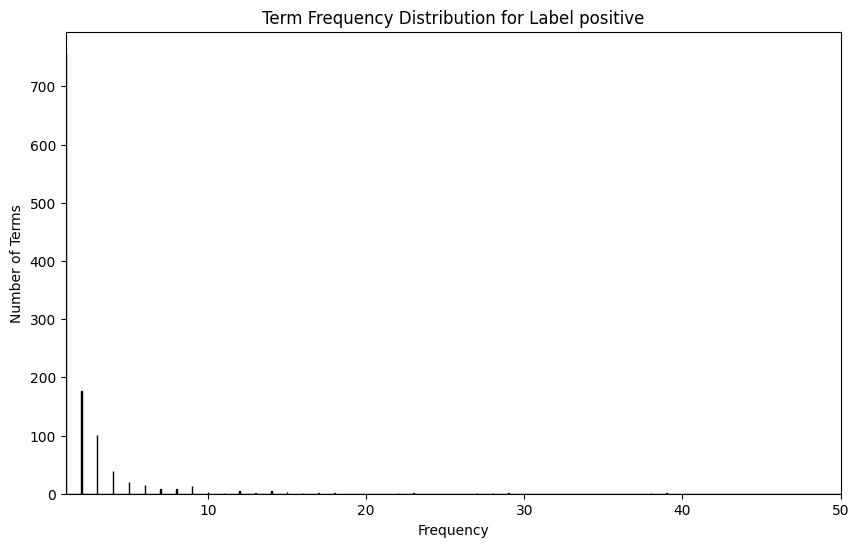

Label: negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'or', 'about', 'even', 'no', 'people', 'there', 'like', 'market', 'my', 'more', 'him', 'them', 'think', 'going', 'now', 'money', 'one', 'would', 'how', 'make', 're', 'do', 'out', 'an', 'down', 'than', 'up', 'other', 'economy', 'from', 'tariffs', 'when', 'by', 'get', 'then', 'who', 'doing', 'over', 'some', 'trade', 'been', 'don', 'fuck', 'doesn', 'see', 'still', 'only', 'why', 'time', 'world', 'any', 'really', 'because', 'our', 'good', 'go', 'back', 'xi', 'point', 'american', 'wants', 'your', 'never', 'everyone', 'much', 'could', 'me', 'shit', 'literally', 'most', 'these', 'bad']

Label: negative
Number of terms in bottom 1%: 21
Filtered terms: ['knowing', 'shame', 'hou

,000,02,03,10,100,1000,10000,11,12,13,...,yeah,year,years,yet,yields,yippee,yo,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
### Begin Assignment Here

# preparations

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each label
labels = X['label_name'].unique()  # Get unique category labels
label_dfs = {}  # Dictionary to store DataFrames for each category

for lab in labels:
    # Filter the original DataFrame by label
    label_dfs[lab] = X[X['label_name'] == lab].copy()

# Function to create term-document frequency DataFrame for each label
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each label
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each label

for lab in labels:
    filt_term_document_dfs[lab] = create_term_document_df(label_dfs[lab])

# Display the filtered DataFrame for one of the labels, feel free to change the number in the vector
label_number=0 #You can change it from 0 to 2
print(f"Filtered Term-Document Frequency DataFrame for Label {labels[label_number]}:")
filt_term_document_dfs[labels[label_number]]

 # Sum over all documents to get total frequency for each word
label_number=2 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Label {labels[label_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 50)
plt.show()


label_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[labels[label_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Label: {labels[label_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


label_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[labels[label_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[labels[label_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"\nLabel: {labels[label_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


label_number=0 #You can change it from 0 to 2

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each label
term_document_dfs = {}

for lab in labels:
    print(f'\nFor label {lab} we filter the following words:')
    term_document_dfs[lab] = filter_top_bottom_words_by_sum(filt_term_document_dfs[lab])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {labels[label_number]}:")
term_document_dfs[labels[label_number]]


In [28]:
### Exercise 16 ###
# based on the analysis above, the results are very similar to that in hte master notebook

#### Similarities and Differences in Filtered Words

### Top %5 most frequent words:
## Similarities: the top of the list for every label is dominated by stopwords regardless of the label/ topic.
# Regardless of whether the label is negative or neutral, the most used words are always: the, of, and, and the like.
# This is because these words are essential for constructing sentences in English and are used frequently across all types of text. They provide the grammatical structure needed for communication.
# They caryy almost no semantic meaning regarding the topic itself.
# Filtering them is important because they appear in every document and would otherwise obscure distinct pattterns.
## Differences: Once the standard stopwords are removed, the remaining top frequent words start to reflect the specific topics of that entry or subreddit.
# Removing the the top %5 is a bit blunt because it removes the noise of the stopwords but risks removing some topic-relevant words as well.

### Bottom %1 least frequent words:
## Similarities: Across all labels, the bottom %1 consists of noise and words that only appear only very rarely.
# These include typos, rare technical terms, or very specific names that do not contribute to the overall understanding of the topic.
## Differences: The content of the noise is highly domain-dependent which means it depends on the subreddit or the topic of that entry specifically.
# In conclusion, filtering these is generally safe and useful because they are too rare to form a manningful pattern in the data. 
# They do not attain minimum support and would only increase the dimensionality of the data without adding value.

Database size (total no of transactions) : 358
Number of items : 402
Minimum Transaction Size : 1
Average Transaction Size : 6.195530726256983
Maximum Transaction Size : 74
Standard Deviation Transaction Size : 8.685104574966624
Variance in Transaction Sizes : 75.64233291081796
Sparsity : 0.9845882320242364


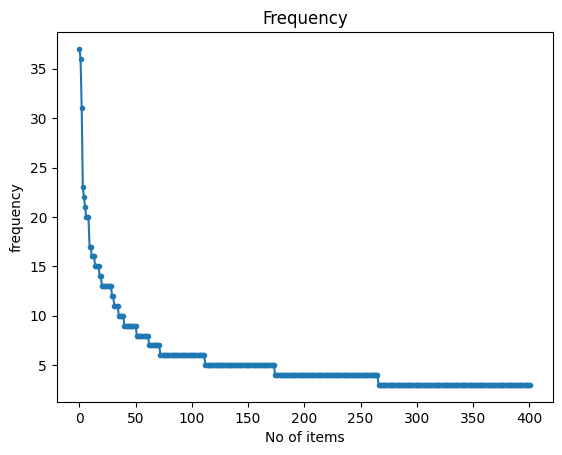

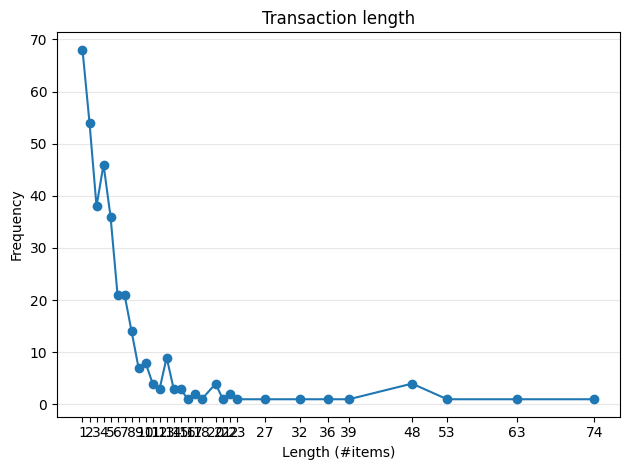

>>> Running FAE Top-K Mining Algorithm (neutral) ...
 TopK frequent patterns were successfully generated using FAE algorithm.
k=100 | Runtime: 0.00544285774230957 seconds | Patterns Found: 100


,Patterns,Support
0,market,37
1,like,36
2,just,31
3,trump,23
4,china,22
5,stock,21
6,want,20
7,com,20
8,stockbuyvest,20
9,com stockbuyvest,20


 TopK frequent patterns were successfully generated using FAE algorithm.
k=200 | Runtime: 43.12608194351196 seconds | Patterns Found: 200


,Patterns,Support
0,market,37
1,like,36
2,just,31
3,trump,23
4,china,22
5,stock,21
6,want,20
7,com,20
8,stockbuyvest,20
9,com stockbuyvest,20


KeyboardInterrupt: 

In [29]:
### Exercise 17 ###
# executed for one label as in the master notebook

# imports and transactional DB file
from PAMI.frequentPattern.topk import FAE as topk_alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
from PAMI.frequentPattern.basic import FPGrowth as fp_alg
from PAMI.extras.convert.DF2DB import DF2DB
from PAMI.extras.dbStats import TransactionalDatabase as tds
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

neutral_df = X[X["label_name"] == "neutral"].copy()

# tokenization preparation; removing punctuation
count_vect = CountVectorizer(
    lowercase=True,
    stop_words="english",
    token_pattern=r"(?u)\b[a-zA-Z]{2,}\b",
    min_df=3
)
X_tdm = count_vect.fit_transform(neutral_df["text"].fillna("").astype(str))
terms = count_vect.get_feature_names_out()
term_document_df = pd.DataFrame(X_tdm.toarray(), columns=terms)
obj = DF2DB(term_document_df)
obj.convert2TransactionalDatabase("td_freq_db_neutral.csv", ">=", 1)

db = tds.TransactionalDatabase("td_freq_db_neutral.csv")
db.run()
db.printStats()
db.plotGraphs()

sep = '\t'
input_file = "td_freq_db_neutral.csv"

# run FAE Top-K Mining Algorithm
print(">>> Running FAE Top-K Mining Algorithm (neutral) ...")
k_values = [100, 200, 300]  # different k values to test
for k in k_values:
    obj_topk = topk_alg.FAE(iFile=input_file,k=k,sep=sep)
    obj_topk.mine()
    patterns_df = obj_topk.getPatternsAsDataFrame()
    runtime = obj_topk.getRuntime()
    print(f"k={k} | Runtime: {runtime} seconds | Patterns Found: {len(patterns_df)}")
    display(patterns_df.head(10))  # display first 10 patterns

# run MaxFPGrowth Mining Algorithm
print("\n>>> Running MaxFPGrowth Mining Algorithm (neutral) ...")
minSup_values = [3, 6, 9]  # different minSup values
for minSup in minSup_values:
    obj_max = max_alg.MaxFPGrowth(iFile=input_file, minSup=minSup, sep=sep)
    obj_max.mine()
    patterns_df = obj_max.getPatternsAsDataFrame()
    runtime = obj_max.getRuntime()
    print(f"minSup={minSup} | Runtime: {runtime} seconds | Patterns Found: {len(patterns_df)}")
    display(patterns_df.head(10))  # display first 10 patterns

# run FPGrowth Mining Algorithm
print("\n>>> Running FPGrowth Mining Algorithm (neutral) ...")
minSup_values = [3, 6, 9]  # different minSup values
for minSup in minSup_values:
    obj_fp = fp_alg.FPGrowth(iFile=input_file, minSup=minSup, sep=sep)
    obj_fp.mine()
    patterns_df = obj_fp.getPatternsAsDataFrame()
    runtime = obj_fp.getRuntime()
    print(f"minSup={minSup} | Runtime: {runtime} seconds | Patterns Found: {len(patterns_df)}")
    display(patterns_df.head(10))  # display first 10 patterns

# runtime comparison plots


In [ ]:
with open("td_freq_db_neutral.csv", "r", encoding="utf-8") as f:
    line = f.readline()
print("repr(line[:200]) =", repr(line[:200]))
print("#commas:", line.count(","), " #tabs:", line.count("\t"))


repr(line[:200]) = 'big\tcompany\tdeal\tdid\tlike\tmake\tplace\tpolitics\tstarting\tstunt\ttalk\n'
#commas: 0  #tabs: 10


In [ ]:
### Exercise 18 ###

# imports
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# preparations
DATA = augmented_df.values  # Use the augmented DataFrame with patterns
labels = X['category_name'].values  # Category labels for coloring
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# dimenionality reduction
X_pca_3d = PCA(n_components=3,random_state=42).fit_transform(DATA)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(DATA)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(DATA)

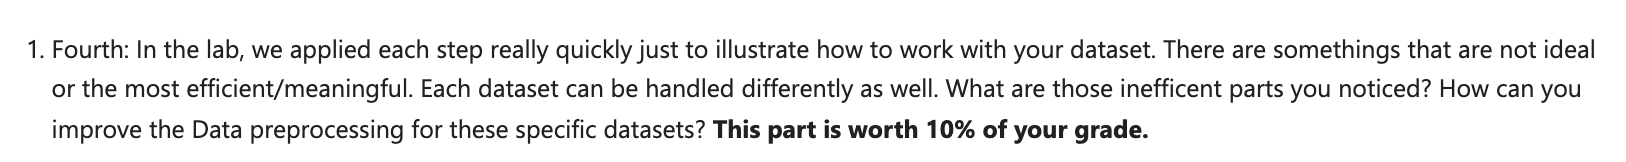

Inefficient / not-ideal parts in the lab workflow
- Converting sparse matrices to dense ( toarray() ) to build big pandas DataFrames (term-document matrices). This is slow + memory-heavy and does not scale well.
- Fitting a new CountVectorizer() separately for each category (or label) (looping over categories and refitting). That repeats tokenization + vocabulary building many times and makes category results not directly comparable (different vocabularies).
- Row-wise Python apply(lambda ...) tokenization (e.g., building X['unigrams'] / tokenized_text per row). It is much slower than using the vectorizer's built-in analyzer and creates duplicated work.
- Naive tokenization with str.split() (no punctuation handling, casing, emojis, URLs, "$TSLA"-style tickers, etc.). This produces noisy tokens and inconsistent preprocessing vs. CountVectorizer.
- Nested loop pattern-feature creation (for each pattern, check subset for each document): O(#docs × #patterns) in pure Python is very slow even at medium size.
- Duplicate handling with drop_duplicates(keep=False) removes all duplicates (including the "original") — often we want to keep one and drop only extra copies.
- Missing-value checking via custom per-column apply is very expensive; better to normalize missing values once (replace ', 'None', 'NaN' → actual NaN) and then use vectorized isna() .
- Not using a single reusable preprocessing pipeline (cleaning scattered across cells) risks inconsistency and data leakage (e.g., fitting preprocessing on all data before splitting).


How to improve preprocessing for the original text dataset (20 Newsgroups)
- Remove boilerplate when loading (headers/footers/quotes) so the model learns topic content, not email artifacts.
- Use one shared vectorizer fit on training data only, then transform everything else (train/test split first).
- Keep everything sparse and compute statistics with sparse operations (e.g., term frequencies via X_count.sum(axis=0)), instead of converting to dense DataFrames.
- Use better vectorizer settings for meaningful features:
    - stopwords removal (stop_words="english" )
    - min_df / max_df to drop ultra-rare and ultra-common useless ones
    - ngram_range=(1,2) if phrases matter
- lemmatization (spaCy) or at least consistent lowercasing + punctuation filtering to reduce feature sparsity.

How to improve preprocessing for the Reddit stock sentiment dataset
- Use only meaningful columns and drop/ignore columns that are mostly missing (e.g., downvotes, upvote_ratio).
- Build a clean text field: combine title + " " + text (and optionally subreddit as a categorical feature).
- Reddit-specific text cleaning:
    - remove/normalize URLs, markdown, \n, \t, repeated whitespace
    - normalize emojis and punctuation spam
    - handle mentions like u/..., r/...
    - preserve stock tickers instead of destroying them:
        - convert $TSLA, TSLA, AAPL patterns into canonical tokens like TICKER_TSLA
- Parse datetime properly (to datetime64) and consider time-based train/ test split (train on earlier posts, test on later) to avoid subtle leakage.
- Parse entities into real lists (it's stored like "['ticker',...]") and turn it into useful features (e.g., entity count, presence of tickers, specific entity flags).
- Deal with duplicates at the source level:
    - dedupe by post_id (or by identical titlettext) and keep one record.
- Use TF-IDF + sparsity controls for modeling (more meaningful than raw counts here)
